   <center> <h1> Predviđanje održavanja viličara </h1> </center>

### 1. Uvod
### 2. CRISP - DM metodologija
### 3. Razumijevanje i definiranje cilja
### 4. Razumijevanje podataka
### 5. Priprema podataka
### 6. Modeliranje
### 7. Evaluacija
### 8. Implementacija
### 9. Završna riječ


## 1. Uvod

   Tema ovogodišnjeg LUMEN data science natjecanja je predviđanje održavanja viličara, odnosno korištenje tehnike <i><b> Predictive maintenance. </b></i> 
Predictive maintenance je tehnika koja nam pomaže odrediti stanja u kojima se nalaze naši strojevi kako bi se odredilo vrijeme kada je stroju potrebno održavanje. Strojevi o kojima govorimo su viličari te je naš zadatak stvoriti model kojim ćemo moći predvidjeti kvar i pravovremeno javiti da treba reagirati na održavanju tog viličara. Tijekom projekta služili smo se CRISP - DM metodologijom o čemu ćemo uskoro detaljnije reći te ćemo Vam kroz ovu dokumentaciju približiti naše razmišljanje i put ka konačnom rješenju odnosno modelu predviđanja. Programski jezik kojim smo se služili je Python, neke prikaze podataka i predviđanja radili smo koristeći Octave te R. Uz ovu dokumentaciju prilažemo i tehničku dokumentaciju u kojoj možete proučiti kako koristiti napisano rješenje. 

## 2. CRISP - DM metodologija

Jedna od stvari na koju smo se trebali referirati u svom rješenju bila je CRISP - DM metodologija.<i><b> CRISP - DM metodologija </b> 
(Cross Industry Standard Process for Data Mining)</i> jedna je od najpopularnijih metodologija za manipuliranje i rad s podacima pri rješavanju problema iz data scienca. Ona jasno opisuje pristup rješavanju problema i daje "upute" na što se fokusirati u kojem dijelu. Na taj je način pristupanje samom problemu lakše, a predstavljanje rješenja preglednije i razumljivije. Možemo reći da je ova metodologija zapravo iterativni proces, jer se na neke korake potrebno vraćati više puta ili ih ponavljati kako bi krajnji rezultat bio bolji(Shema 1). Koraci kroz koje prolazimo su:

1. Razumijevanje poslovanja/ problema
2. Razumijevanje podataka
3. Priprema podataka
4. Modeliranje
5. Vrednovanje(Evaluacija)
6. Korištenje

Nadalje, dokumentacija našeg rješenja slijedit će korake ove metodologije radi preglednosti, ali i zbog toga što smo upravo koristeći se njome došli do našeg rješenja. 

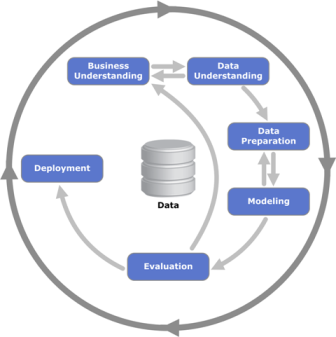

<b>Shema 1.</b> Grafički prikaz koraka u CRISP - DM metodologiji

## 3. Razumijevanje i definiranje cilja 

Razumijevanje problema, to jest definiranje i razumijevanje cilja jedan je od najvažnijih koraka u ovoj metodologiji. Pogrešno shvaćanje problema ili cilja može dovesti do neuspjeha u rješavanju, stoga smo ovom koraku pristupili oprezno i detaljno prošli kroz upute i informacije koje smo dobili. 
Strojevi čije podatke smo dobili se vremenom postepeno troše i dolazi do zamora opreme, no na temelju podataka koje imamo o njima možemo predvidjeti mogući kvar i tada pripremljeno reagirati. Pravovremeno reagiranje smanjuje mogućnost dodatnih troškova koji su mogući zbog čekanja dijelova koje je potrebno zamijeniti na stroju ili čekanju stručnog osoblja za održavanje. Naš je cilj, na osnovi dobivenih podataka, nagovijestiti kvar i spriječiti dodatne troškove.

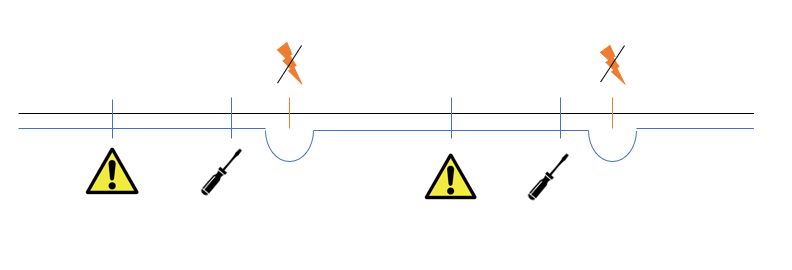

<b>Shema 2.</b> Grafički prikaz održavanja strojeva prije kvara

## 4. Razumijevanje podataka

Nakon postavljanja ciljeva i dubljeg shvaćanja problema potrebno je krenuti s konkretnijim poslom. Sljedeći korak u metodologiji kojom se služimo je prikupljanje podataka, njihovo razumijevanje i analiza. Jedan dio ovog koraka je bio odrađen umjesto nas, što smo također morali uzeti u obzir. Naime, u trećem je koraku bitno odrediti koji podaci su nam važni za dobivanje informacija te ih na pravilan način prikupiti, a kasnije onda na njima obavljati analizu. Mi podatke nismo morali mjeriti podatke i tražiti koji su senzori dovoljni za uvid u stanje stroja već su to organizatori odradili umjesto nas. Posljedica toga je da za dva stroja imamo nešto više podataka i relevatne senzore koji su dovoljni pokazatelji kvarova. 
U ovom smo koraku odlučili posvetiti malo više vremena proučavanju literature kako bi istražili sve potrebne pojmove vezane uz problem kojim se bavimo i podatke kojima raspolažemo. Naš prvi korak u ovom tijeku projekta bio je učiniti podatke koje imamo pristupačnijim nama. 

### 4.1. Kod za učitavanje podataka

Prvi programerski korak u rješavanju bio je podijeliti veliku datoteku sa svim senzorima i strojevima u manje datoteke za lakši rad s njima. Napisali smo funkciju pomoću koje stvaramo mapu za svaki od stroja, zatim u svakoj mapi datoteku za svaki od senzora. Na kraju postupka imamo podatke posebno za 7 strojeva za svih 6 senzora s vrijednostima brzine i akceleracije. 

In [7]:
import dataset_loader as dl
dl.split_into_attr_tree("data_full", "data", ["machine_name", "sensor_type"])
#krajnji rezultat izgleda kao na slici
#za više informacija o funkciji pogledati python/dataset_loader.py

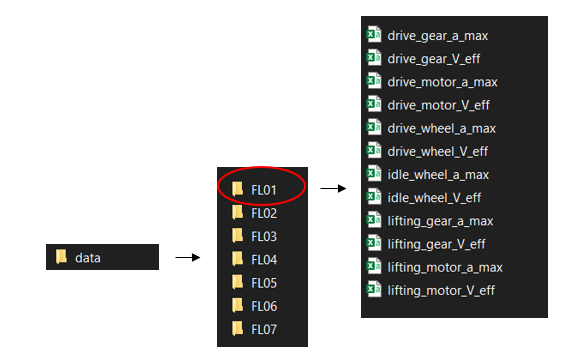

<b>Slika 1.</b> Prikaz mapa i datoteka nakon poziva funkcije

<hr>
Nakon što smo na ovaj način podjelili originalnu datoteku lakše je prikazivati podatke i raditi analizu. Na primjeru jednog stroja i senzora prikazat ćemo strukturu podataka. Iz datoteka smo primjetili da se mjerenja ponavljaju tijekom dana, mjerenja ne traju svugdje jednako te da mjerenja na senzorima nisu usklađena. Ovo će nam biti bitno pri filtriranju podataka i korištenju određenih alata za korelacije.  

In [8]:
import pandas as pd
data = "data/FL01/drive_motor_V_eff.csv"
inf = pd.read_csv(data, sep = ';' , header = 0)
inf

,machine_name,sensor_type,date_measurement,start_timestamp,end_timestamp,realvalue,unit
0,FL01,drive_motor_V_eff,2017-09-02,2017-09-02 15:26:42.12,2017-09-02 15:26:42.12,0.565,mm/s
1,FL01,drive_motor_V_eff,2017-09-02,2017-09-02 15:26:44.933,2017-09-02 15:26:44.933,1.023,mm/s
2,FL01,drive_motor_V_eff,2017-09-02,2017-09-02 15:26:47.763,2017-09-02 15:26:47.763,1.447,mm/s
3,FL01,drive_motor_V_eff,2017-09-02,2017-09-02 15:26:50.59,2017-09-02 15:26:50.59,1.736,mm/s
4,FL01,drive_motor_V_eff,2017-09-02,2017-09-02 15:26:53.403,2017-09-02 15:26:53.403,2.233,mm/s
...,...,...,...,...,...,...,...
33935,FL01,drive_motor_V_eff,2019-07-24,2019-07-24 22:20:19.287,2019-07-24 22:20:19.287,2.817,mm/s
33936,FL01,drive_motor_V_eff,2019-07-24,2019-07-24 22:20:20.727,2019-07-24 22:20:20.727,2.825,mm/s
33937,FL01,drive_motor_V_eff,2019-07-24,2019-07-24 22:20:22.09,2019-07-24 22:20:22.09,2.835,mm/s
33938,FL01,drive_motor_V_eff,2019-07-24,2019-07-24 22:20:23.5,2019-07-24 22:20:23.5,2.809,mm/s


### 4.2. Istraživanje podataka

Kako su podaci koje smo dobili tehničke prirode, odlučili smo malo više istražiti o tehničkim svojstvima koji su nam potrebni. Analiza vibracija je proces kojim ćemo se baviti i koji služi za mjerenje razine vibracija i frekvencije stroja te pomoću tih podataka možemo analizirati stanje stroja. Upoznali smo se s problemima koje analiza vibracija može detektirati, logičkim cjelinama od kojih se sastoji i kategorijama mjerenja vibracija. Prilikom istraživanja naišli smo na standarde koji su vezani uz brzinu. Primjetili smo kojoj vrsti strojeva pripadaju naši viličari te ćemo podatke za tu kategoriju kasnije koristiti. 


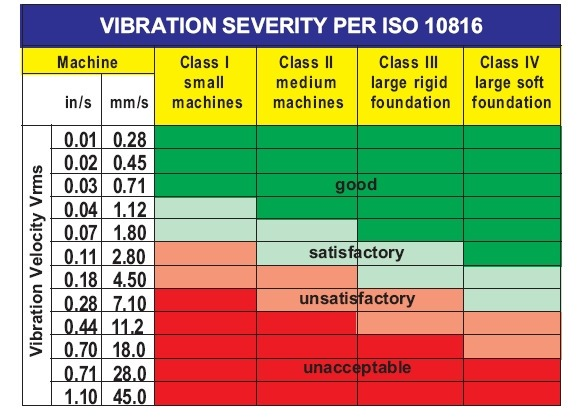

<b>Slika 2.</b> Tablica klasifikacije stanja strojeva prema vrijednostima brzine

### 4.3. Analiza podataka

U završnom dijelu drugog koraka odlučili smo se grafički prikazati podatke, probati pronaći koeficijent korelacije među senzorima i filtrirati podatke po traženim svojstvima. Slušajući savjete, odlučili smo dosta vremena utrošiti na izgled naših podataka, tražeći u njima informacije koje bi nam mogle biti od koristi u daljnjem rješavanju problema. U ovom smo se koraku poslužili znanjima iz statistike(karakteristična petorka, koeficijent korelacije, outlineri, histogrami, distribucije), programiranja u R i Octavu te Pythonu. Na ovom ćemo mjestu spomenuti detalj koji se lako uoči u podacima, a bitan je za daljnje algoritme. Naime, nakon održavanja primijetili smo nagli skok u podacima, no o ovoj pojavi reći ćemo još nešto kasnije.
Ukratko ćemo prikazati zanimljive grafove, rezultate i dijelove koda koje smatramo najkorisnijima. 

<hr>
Najprije ćemo prikazati graf <i>rol-meana</i> za stroj broj 3. Razlog zbog kojeg smo plotanje odlučili prikazati baš na ovom primjeru je taj što želimo skrenuti pažnju na nagli skok u vrijednostima nakon održavanja koji smo spomenuli gore.

In [9]:
%matplotlib inline
import visual_test as v
matplotlib.use('module://ipykernel.pylab.backend_inline')
v.Plot(machine="FL01",sensors=filter.list_V_sensors,feature = "rol-mean")

AttributeError: type object 'filter' has no attribute 'list_V_sensors'

........

## 5. Priprema podataka

Sljedeći korak koji prethodi "glavnom djelu" rješavanja je priprema podataka. Naši podaci neće uvijek biti u obliku u kojem nam je pogodno koristiti algoritme na njima, primjerice neki će algoritmi bolje raditi na standardiziranim podacima, stoga je veoma važno pripremiti odgovarajući oblik podataka kako bi se pri treniranju fokusirali samo na algoritam. U ovom dijelu također bi se trebalo fokusirati na nadoknađivanje vrijednosti ukoliko izostaju.
<hr>
Jedan od prvih izazova s kojima smo se susreli je bio usko vezan uz vremenske intervale i vremenom mjerenja podataka koji nije usklađen kod svih strojeva niti među senzorima. Tom smo problemu pristupili na razne načine. Jedan isprobani način usklađivanja bio je: <b>(ONAJ DIO KOJI JE LUKA PRICAO)</b>. Analizom odbačenih i zadržanih intervala primijetili smo neučinkovitost tog algoritma. (...) 

In [10]:
#primjer iz ovog djela u pythonu ili shema onog sta je luka crtao

## 6. Modeliranje

Nakon vremena provedenog u pripremi podataka, traženju bitnih svojstava i analizi danih podataka, došlo je vrijeme za iskoristiti sve što smo pripremili. U ovom koraku potrebno je posvetiti se <i>machine learning algoritmima</i> i pomaknuti se bliže cilju odnosno pronaći algoritam koji će nam predvidjeti kvar, omogućiti pravovremeno održavanje. Proveli smo vrijeme razmjenjujući ideje i pokušaje, od kojih će sigurno jedan raditi ispravno. Niti jedan od tih pokušaja nismo naglo odbacili ili izbrisali iz naših datoteka, svaki od tih pokušaja iako nije rješenje, kao povratnu informaciju, dao nam je neku smjernicu za daljnje programiranje. Odlučili smo posvetiti dosta vremena i za definiranje i provjeravanje pretpostavki svakog algoritma, a nakon izvršenja i analiziranje njegove točnosti. Tu smo se pripomogli činjenicom da imamo dovoljno senzora kako bi nam jedan služio kao model za treniranje. U dokumentaciji nećemo detaljno ulaziti u svaki od tih pokušaja koje smo imali, ali su svakako vrijedni spomena.
<hr>

<i><b>1. Linearni regresijski model</b></i>

Za početak odlučili smo krenuti s nečim jednostavnijim i isprobati najkorišteniji model odnosno linearni regresijski model. Analizirajući naše podatke i gledajući grafove, došli smo na ideju da korelacija među određenim senzorima mora postojati i da je možemo prikazati na ovaj način. Nakon napisanog linearnog modela, otišli smo korak dalje i povećali stupanj. Ovaj pokušaj modeliranja odlučili smo raditi u Octavu i usputno prikazati u njemu ovisnost grafički. 

In [11]:
(Lukin graf s pravcem i dio koda mozda) slika

SyntaxError: invalid syntax (<ipython-input-11-2b0df6d9e7f1>, line 1)

<i><b>2. Anomaly detection </b></i>

Proučavajući literaturu povezanu s machine learningom uočili smo ovaj pristup rješavanju i pokušali ga primijeniti na naše podatke. U tu smo svrhu pokušali svesti naše podatke tako da imaju približnu Gaussovu distribuciju. Ovom je pristupu moguće pristupiti višedimenzionalno, no mi smo u našem razmatranju promatrali jednodimenzionalni slučaj. Ovaj bi model trebao na temelju podataka pronaći anomalije i predvidjeti kvar. Problem na koji smo naišli kod ovog modela je već spomenut ranije,a to su iznenadne promjene u vrijednosti podataka nakon samog održavanja te ih naš model prepoznaje kao anomalije. 

<i><b> 3. Rješenje </b></i>

Nakon pokušaja i "pogreški" dolazimo do algoritma koji smo spremni predati Vam kao naše rješenje.
Spomenuli smo već kako smo istraživanjem teme naišli na klasifikaciju strojeva u odnosu na brzine.(Slika 2.)
To nam je dalo ideju da se probamo fokusirati na taj dio i vidjeti što s time dobivamo. Napisali smo algoritam koji (...)
<b>(LUKIN DIO NADOPUNITI)</b> 

Algoritam izgleda ovako(...) 

## 7. Evaluacija

Došli smo do kraja našeg rješavanja i bavljenja zadanom problematikom. Algoritam smo napisali i sad je vrijeme da ga i Vi testirate. Kako se u cijelom ovom radu držimo CRISP - DM metodologije, upravo je evaluacija njen završni korak. Evaluaciju rješenja možete provesti koristeći tehničku dokumentaciju koju Vam prilažemo uz rješenje i ovu dokumentaciju. Htjeli smo fokus staviti na algoritam i proučavanje problema, stoga je sustav za evaluaciju jednostavan, ali precizno definira rezultate i obrađuje zahtjeve korisnika. 


## 8. Završna riječ - zaključak

Na kraju našeg rada, sumirali smo novostečeno znanje i prezentirali Vam ga u ovom obliku. Iako sam algoritam ne izgleda previše zahtjevno, vjerujemo da je analiziranje podataka i priprema podataka bila jednako važan dio posla, kao i sam algoritam. Bez shvaćanja podataka, te bez grafičkog prikazivanja istih, rezultati bi se doimali apstraktni i možda neshvaćeni. Vjerujemo da slika govori više od 1000 riječi, te da je priprema pola posla, što smo se doista uvjerili pri pisanju programa. Također, CRISP - DM metodologija bila je ključan dio u tome da naše razmišljanje i rješavanje problema ostane tijekom cijelog vremena razumljivo za izložiti i nama za kretati se konačnom rješenju.